In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from sklearn. linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [54]:
df=pd.read_csv('HDI.csv')

In [55]:
df.head()

,Stunting Management,Poverty,Happiness Index,HDI
0,61.95,806.82,71.24,72.18
1,58.56,1268.19,70.57,72.00
2,63.97,335.21,71.34,72.65
3,60.04,485.03,71.80,72.94
4,61.03,279.37,75.17,71.63


In [56]:
df.describe()

,Stunting Management,Poverty,Happiness Index,HDI
count,34.000000,34.000000,34.000000,34.000000
mean,63.209412,769.445882,72.610588,71.361176
std,6.900006,1082.365883,2.097603,3.937439
min,41.700000,49.460000,68.080000,60.620000
25%,60.267500,198.195000,71.265000,69.730000
50%,64.005000,342.730000,72.430000,71.650000
75%,66.217500,812.220000,74.340000,72.600000
max,79.940000,4181.290000,76.340000,81.110000


In [57]:
df.isnull(). sum()

Stunting Management    0
Poverty                0
Happiness Index        0
HDI                    0
dtype: int64

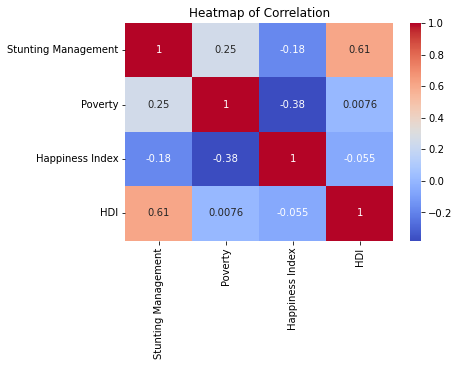

In [58]:
# Calculating Corr Matrix
correlation_matrix = df.corr()

# Making heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation')
plt.show()

# Hypotesis Testing

In [59]:
import statsmodels.api as sm

In [60]:
# Definition of predictor and response variables
X = df[['Stunting Management', 'Poverty', 'Happiness Index']]
y = df['HDI']

# Adding a constant to the predictor variables
X = sm.add_constant(X)

# Building the multiple linear regression model
model = sm.OLS(y, X).fit()

# Displaying the model summary
print(model.summary())

# Hypothesis Testing

# Hypothesis testing for the stunting_management regression coefficient
hypothesis = 'Stunting Management = 0'
t_test_results = model.t_test(hypothesis)
t_stat = t_test_results.tvalue[0][0]
p_value = t_test_results.pvalue  # Mengakses nilai p-value langsung tanpa indeks
print(f"Koefisien Regresi Stunting Management: t-statistic = {t_stat}, p-value = {p_value}")

if p_value < alpha:
    print("Null hypothesis (H0) rejected, there is sufficient evidence to claim a relationship between stunting_management and HDI.")
else:
    print("Insufficient evidence to claim a relationship between stunting_management and HDI.")



                            OLS Regression Results                            
Dep. Variable:                    HDI   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     6.420
Date:                Sun, 16 Apr 2023   Prob (F-statistic):            0.00172
Time:                        16:16:43   Log-Likelihood:                -85.904
No. Observations:                  34   AIC:                             179.8
Df Residuals:                      30   BIC:                             185.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  47.7022    

In [62]:
# Hypothesis testing for Poverty regression coefficient
hypothesis_poverty = 'Poverty = 0'
t_test_results_poverty = model.t_test(hypothesis_poverty)
t_stat_poverty = t_test_results_poverty.tvalue[0][0]
p_value_poverty = t_test_results_poverty.pvalue
print(f"Regression Coefficient for Poverty: t-statistic = {t_stat_poverty}, p-value = {p_value_poverty}")

# Hypothesis testing for Happiness Index regression coefficient
hypothesis_happiness = 'Happiness Index = 0'
t_test_results_happiness = model.t_test(hypothesis_happiness)
t_stat_happiness = t_test_results_happiness.tvalue[0][0]
p_value_happiness = t_test_results_happiness.pvalue
print(f"Regression Coefficient for Happiness Index: t-statistic = {t_stat_happiness}, p-value = {p_value_happiness}")

alpha = 0.05  # Set alpha level
if p_value_poverty < alpha:
    print("Null hypothesis (H0) related to Poverty variable is rejected, there is sufficient evidence to claim a relationship between Poverty and HDI.")
else:
    print("Insufficient evidence to claim a relationship between Poverty and HDI.")

if p_value_happiness < alpha:
    print("Null hypothesis (H0) related to Happiness Index variable is rejected, there is sufficient evidence to claim a relationship between Happiness Index and HDI.")
else:
    print("Insufficient evidence to claim a relationship between Happiness Index and HDI.")


Regression Coefficient for Poverty: t-statistic = -0.9561867706905068, p-value = 0.34662026425877646
Regression Coefficient for Happiness Index: t-statistic = 0.037175711042238956, p-value = 0.9705911842950771
Insufficient evidence to claim a relationship between Poverty and HDI.
Insufficient evidence to claim a relationship between Happiness Index and HDI.


## Building Regression Model

Linear Regression Model with Single Predictor:
                 Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.350   
Dependent Variable:  HDI              AIC:                177.0002
Date:                2023-04-16 16:26 BIC:                180.0529
No. Observations:    34               Log-Likelihood:     -86.500 
Df Model:            1                F-statistic:        18.73   
Df Residuals:        32               Prob (F-statistic): 0.000138
R-squared:           0.369            Scale:              10.084  
------------------------------------------------------------------
                     Coef.  Std.Err.   t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               49.4429   5.0933 9.7075 0.0000 39.0683 59.8176
Stunting Management  0.3468   0.0801 4.3282 0.0001  0.1836  0.5099
------------------------------------------------------------------
Omnibus:              0.796      

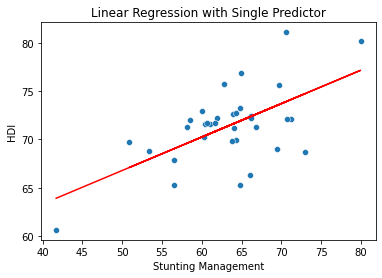

In [63]:
# 1. Fit linear regression with single predictor
# Choose one predictor variable as the target
X_single = df['Stunting Management']
y = df['HDI']

# Add constant to the predictor variable
X_single = sm.add_constant(X_single)

# Build linear regression model with single predictor
model_single = sm.OLS(y, X_single).fit()

# Display model summary
print("Linear Regression Model with Single Predictor:")
print(model_single.summary2())

# Plot data and regression line
sns.scatterplot(x='Stunting Management', y='HDI', data=df)
plt.plot(X_single['Stunting Management'], model_single.predict(X_single), color='r')
plt.xlabel('Stunting Management')
plt.ylabel('HDI')
plt.title('Linear Regression with Single Predictor')
plt.show()

Linear Regression Model with Single Predictor (Poverty):
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -0.031  
Dependent Variable: HDI              AIC:                192.6669
Date:               2023-04-16 16:32 BIC:                195.7197
No. Observations:   34               Log-Likelihood:     -94.333 
Df Model:           1                F-statistic:        0.001850
Df Residuals:       32               Prob (F-statistic): 0.966   
R-squared:          0.000            Scale:              15.987  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     71.3399     0.8456   84.3664   0.0000   69.6175   73.0623
Poverty    0.0000     0.0006    0.0430   0.9660   -0.0013    0.0013
-----------------------------------------------------------------
Omnibus:              3.55

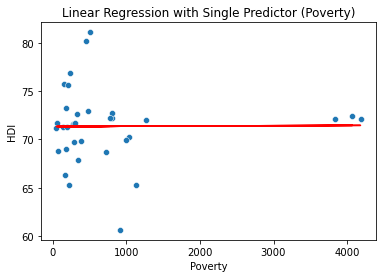

In [64]:
# Choose one predictor variable as the target
X_single_poverty = df['Poverty']
X_single_happiness = df['Happiness Index']
y = df['HDI']

# Add constant to the predictor variable
X_single_poverty = sm.add_constant(X_single_poverty)
X_single_happiness = sm.add_constant(X_single_happiness)

# Build linear regression model with single predictor (Poverty)
model_single_poverty = sm.OLS(y, X_single_poverty).fit()

# Display model summary (Poverty)
print("Linear Regression Model with Single Predictor (Poverty):")
print(model_single_poverty.summary2())

# Plot data and regression line (Poverty)
sns.scatterplot(x='Poverty', y='HDI', data=df)
plt.plot(X_single_poverty['Poverty'], model_single_poverty.predict(X_single_poverty), color='r')
plt.xlabel('Poverty')
plt.ylabel('HDI')
plt.title('Linear Regression with Single Predictor (Poverty)')
plt.show()

Linear Regression Model with Single Predictor (Happiness Index):
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -0.028  
Dependent Variable: HDI              AIC:                192.5658
Date:               2023-04-16 16:34 BIC:                195.6185
No. Observations:   34               Log-Likelihood:     -94.283 
Df Model:           1                F-statistic:        0.09719 
Df Residuals:       32               Prob (F-statistic): 0.757   
R-squared:          0.003            Scale:              15.939  
-----------------------------------------------------------------
                  Coef.  Std.Err.    t    P>|t|   [0.025  0.975] 
-----------------------------------------------------------------
const            78.8614  24.0676  3.2767 0.0025 29.8373 127.8855
Happiness Index  -0.1033   0.3313 -0.3118 0.7572 -0.7782   0.5716
-----------------------------------------------------------------
Omnibus:               3.818

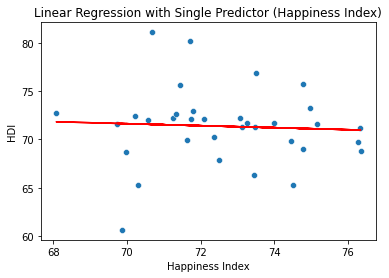

In [65]:
# Build linear regression model with single predictor (Happiness Index)
model_single_happiness = sm.OLS(y, X_single_happiness).fit()

# Display model summary (Happiness Index)
print("Linear Regression Model with Single Predictor (Happiness Index):")
print(model_single_happiness.summary2())

# Plot data and regression line (Happiness Index)
sns.scatterplot(x='Happiness Index', y='HDI', data=df)
plt.plot(X_single_happiness['Happiness Index'], model_single_happiness.predict(X_single_happiness), color='r')
plt.xlabel('Happiness Index')
plt.ylabel('HDI')
plt.title('Linear Regression with Single Predictor (Happiness Index)')
plt.show()

In [66]:
# 2. Include multiple predictors and at least one interaction term
# Select multiple predictor variables and add interaction if needed
X_multiple = df[['Stunting Management', 'Poverty', 'Happiness Index']]
X_multiple['Stunting Management_Poverty_Interaction'] = X_multiple['Stunting Management'] * X_multiple['Poverty']

# Add constant to predictor variables
X_multiple = sm.add_constant(X_multiple)

# Build linear regression model with multiple predictors and interaction
model_multiple = sm.OLS(y, X_multiple).fit()

# Display model summary
print("Linear Regression Model with Multiple Predictors and Interaction:")
print(model_multiple.summary2())

Linear Regression Model with Multiple Predictors and Interaction:
                             Results: Ordinary least squares
Model:                      OLS                      Adj. R-squared:             0.308   
Dependent Variable:         HDI                      AIC:                        181.7501
Date:                       2023-04-16 16:38         BIC:                        189.3819
No. Observations:           34                       Log-Likelihood:             -85.875 
Df Model:                   4                        F-statistic:                4.675   
Df Residuals:               29                       Prob (F-statistic):         0.00491 
R-squared:                  0.392                    Scale:                      10.726  
-----------------------------------------------------------------------------------------
                                         Coef.  Std.Err.    t    P>|t|   [0.025   0.975] 
---------------------------------------------------------------

In [67]:
# 3. Fit linear regression with transformations
# Choose the desired transformation for predictor variables
X_transformed = df[['Stunting Management', 'Poverty', 'Happiness Index']]
X_transformed['Stunting_Management_Squared'] = np.square(X_transformed['Stunting Management'])

# Add constant to predictor variables
X_transformed = sm.add_constant(X_transformed)

# Build linear regression model with transformed predictors
model_transformed = sm.OLS(y, X_transformed).fit()

# Display model summary
print("Linear Regression Model with Transformed Predictors:")
print(model_transformed.summary2())

# Compare model with and without transformations
print("Comparison between Model without Transformation and Model with Transformation:")
print(model_single.compare_f_test(model_transformed))

Linear Regression Model with Transformed Predictors:
                       Results: Ordinary least squares
Model:                  OLS                  Adj. R-squared:         0.311   
Dependent Variable:     HDI                  AIC:                    181.6259
Date:                   2023-04-16 16:41     BIC:                    189.2577
No. Observations:       34                   Log-Likelihood:         -85.813 
Df Model:               4                    F-statistic:            4.718   
Df Residuals:           29                   Prob (F-statistic):     0.00468 
R-squared:              0.394                Scale:                  10.687  
-----------------------------------------------------------------------------
                             Coef.  Std.Err.    t    P>|t|   [0.025   0.975] 
-----------------------------------------------------------------------------
const                       39.7887  30.3115  1.3127 0.1996 -22.2053 101.7827
Stunting Management          0.686